In [1]:
# !pip install pycaret

In [2]:
import pandas as pd
import seaborn as sns

from pycaret.classification import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [5]:
# train['mean_consumption'] = train.groupby('Consumer_number')['Consumption'].transform('mean')
# train['consumption_count'] = train.groupby('Consumer_number')['Consumption'].transform('count')
# train = train.drop('Consumer_number', axis=1)

In [6]:
train.head()

,Year,Month,Consumer_type,Consumption,Consumer_number,Installation_zone
0,2013,1,domestic,0,MOGV36480546611521,Installation_zone 1
1,2013,1,industrial,5,BECS02817768252637,Installation_zone 2
2,2013,1,domestic,6,VRFW65577141436242,Installation_zone 2
3,2013,1,domestic,1,QLLI18662653137621,Installation_zone 2
4,2013,1,domestic,13,HYUO61823402850645,Installation_zone 2


In [7]:
counts = train['Consumer_type'].value_counts()
print(counts)

domestic               236167
rural domestic          63086
industrial              21057
rural commercial         5541
construction             2235
low income families       999
rural expansion           890
Name: Consumer_type, dtype: int64


In [8]:
# train, test = train_test_split(train, test_size=0.1, stratify=train['Consumer_type'], random_state=42)

test2 = pd.read_csv("test_v1.csv")
# test2['mean_consumption'] = test2.groupby('Consumer_number')['Consumption'].transform('mean')
# test2['consumption_count'] = test2.groupby('Consumer_number')['Consumption'].transform('count')
# test2 = test2.drop('Consumer_number', axis=1)

In [9]:
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
test2 = test2.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
train.shape

(329975, 6)

In [11]:
counts = train['Consumer_type'].value_counts()
print(counts)

domestic               236167
rural domestic          63086
industrial              21057
rural commercial         5541
construction             2235
low income families       999
rural expansion           890
Name: Consumer_type, dtype: int64


In [12]:
# test.shape

In [13]:
# counts = test['Consumer_type'].value_counts()
# print(counts)

In [14]:
# clf1 = setup(train, target='Consumer_type', fix_imbalance=True,  use_gpu=True)
clf1 = setup(train, target='Consumer_type')

best_model = compare_models()

,Description,Value
0,Session id,4682
1,Target,Consumer_type
2,Target type,Multiclass
3,Target mapping,"construction: 0, domestic: 1, industrial: 2, low income families: 3, rural commercial: 4, rural domestic: 5, rural expansion: 6"
4,Original data shape,"(329975, 6)"
5,Transformed data shape,"(329975, 6)"
6,Transformed train set shape,"(230982, 6)"
7,Transformed test set shape,"(98993, 6)"
8,Numeric features,3
9,Categorical features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9924,0.9997,0.9924,0.9945,0.9932,0.9829,0.9830,3.3520
dt,Decision Tree Classifier,0.9901,0.9904,0.9901,0.9934,0.9914,0.9779,0.9779,0.3980
catboost,CatBoost Classifier,0.9901,0.9995,0.9901,0.9919,0.9908,0.9780,0.9781,32.6240
rf,Random Forest Classifier,0.9887,0.9992,0.9887,0.9900,0.9888,0.9747,0.9747,4.3860
gbc,Gradient Boosting Classifier,0.9882,0.9948,0.9882,0.9947,0.9911,0.9741,0.9745,30.0130
nb,Naive Bayes,0.9850,0.9944,0.9850,0.9830,0.9834,0.9663,0.9663,0.3250
qda,Quadratic Discriminant Analysis,0.9846,0.9945,0.9846,0.9826,0.9832,0.9654,0.9654,0.3470
et,Extra Trees Classifier,0.9823,0.9993,0.9823,0.9838,0.9820,0.9607,0.9609,3.0190
lda,Linear Discriminant Analysis,0.9639,0.9875,0.9639,0.9661,0.9590,0.9195,0.9200,0.3370
knn,K Neighbors Classifier,0.9560,0.9772,0.9560,0.9495,0.9488,0.8994,0.9000,1.1190


In [15]:
# result_best_model = predict_model(best_model, data=test)

In [16]:
# result_best_model.shape

In [17]:
# result_best_model.head()

In [18]:
# matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [19]:
result_best_model = predict_model(best_model, data=test2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7729,0.9948,0.7729,0.8566,0.7608,0.7350,0.7511


In [20]:
result_best_model.shape

(3500, 8)

In [21]:
result_best_model.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type,prediction_label,prediction_score
0,2013,8,17,UDDW56971224537260,Installation_zone 3,construction,domestic,0.9674
1,2017,11,0,KQXL90455068893320,Installation_zone 3,low income families,domestic,0.9983
2,2016,6,4,SIEU17581574674780,Installation_zone 1,low income families,low income families,0.7610
3,2016,1,0,TYER04922445407421,Installation_zone 7,construction,construction,0.9984
4,2013,1,6,VSJQ94108683812238,Installation_zone 4,domestic,domestic,0.9972


<AxesSubplot: >

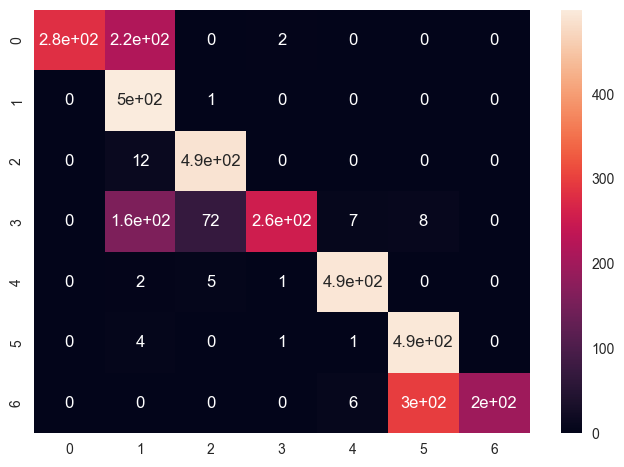

In [22]:
matrix = confusion_matrix(result_best_model['Consumer_type'], result_best_model['prediction_label'])
sns.heatmap(matrix, annot=True)

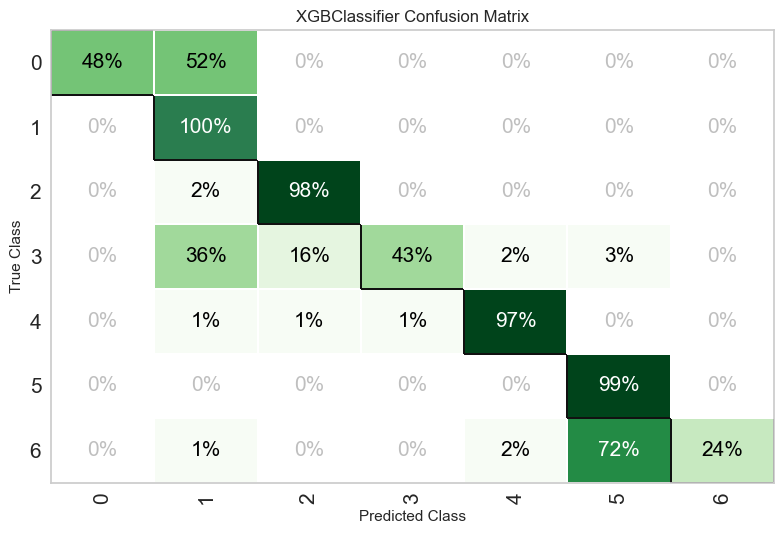

In [23]:
plot_model(best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [24]:
# tuned_best_model = tune_model(best_model)

In [25]:
# plot_model(tuned_best_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [26]:
# result_tuned_best_model = predict_model(tuned_best_model, data=test)

In [27]:
# matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [28]:
# result_tuned_best_model = predict_model(tuned_best_model, data=test2)

In [29]:
# matrix = confusion_matrix(result_tuned_best_model['Consumer_type'], result_tuned_best_model['prediction_label'])
# sns.heatmap(matrix, annot=True)

In [30]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
# evaluate_model(tuned_best_model)

In [32]:
save_model(best_model, 'model_v1')
# save_model(tuned_best_model, 'tuned_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Month', 'Consumption'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_valu...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_thre

In [33]:
competition = pd.read_csv("competition.csv")

In [34]:
competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [35]:
# competition['mean_consumption'] = competition.groupby('Consumer_number')['Consumption'].transform('mean')
# competition['consumption_count'] = competition.groupby('Consumer_number')['Consumption'].transform('count')

# consumer_number = competition['Consumer_number']
# competition = competition.drop('Consumer_number', axis=1)

In [36]:
competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone
0,2013,1,1,VENX08444954462680,Installation_zone 1
1,2013,1,2,GRXC33020746550125,Installation_zone 1
2,2013,1,1,FCGQ19814303536339,Installation_zone 1
3,2013,1,5,EQKL85694875580467,Installation_zone 3
4,2013,1,14,KCXW91343862250032,Installation_zone 3


In [37]:
result_competition = predict_model(best_model, data=competition)

result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

# result_competition = result_competition.drop('consumption_count', axis=1)
# result_competition = result_competition.drop('mean_consumption', axis=1)
result_competition = result_competition.drop('prediction_score', axis=1)

# result_competition['Consumer_number'] = consumer_number

In [38]:
result_competition.head()

,Year,Month,Consumption,Consumer_number,Installation_zone,Consumer_type
0,2013,1,1,VENX08444954462680,Installation_zone 1,domestic
1,2013,1,2,GRXC33020746550125,Installation_zone 1,domestic
2,2013,1,1,FCGQ19814303536339,Installation_zone 1,domestic
3,2013,1,5,EQKL85694875580467,Installation_zone 3,domestic
4,2013,1,14,KCXW91343862250032,Installation_zone 3,domestic


Text(0.5, 1.0, 'Count of Consumer_type')

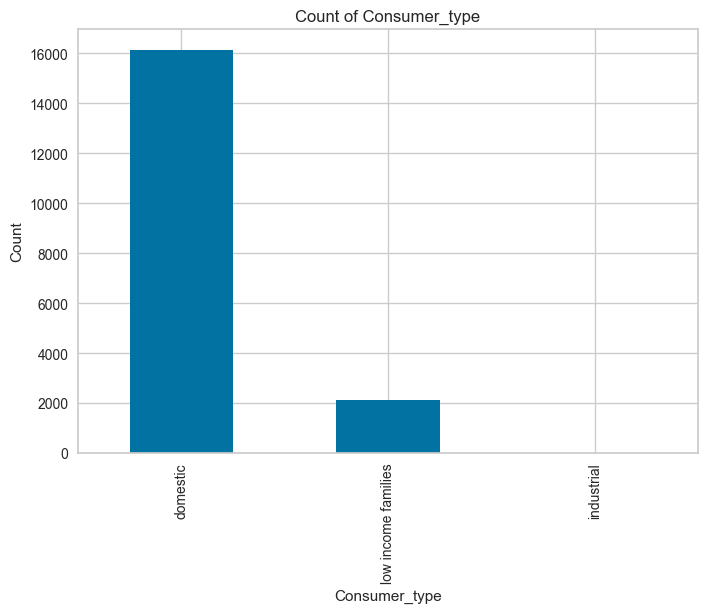

In [39]:
result_competition['Consumer_type'].value_counts().plot(kind='bar')

plt.xlabel('Consumer_type')
plt.ylabel('Count')
plt.title('Count of Consumer_type')

In [40]:
result = pd.DataFrame()
result['Consumer_number'] = result_competition['Consumer_number']
result['Consumer_type'] = result_competition['Consumer_type']
result.to_csv('competition_v1.csv', index=False)

In [41]:
# result_competition = predict_model(tuned_best_model, data=competition)

# result_competition = result_competition.rename(columns={'prediction_label': 'Consumer_type'})

# result_competition = result_competition.drop('consumption_count', axis=1)
# result_competition = result_competition.drop('mean_consumption', axis=1)
# result_competition = result_competition.drop('prediction_score', axis=1)

In [42]:
# result_competition.head()

In [43]:
# result_competition['Consumer_type'].value_counts().plot(kind='bar')

# plt.xlabel('Consumer_type')
# plt.ylabel('Count')
# plt.title('Count of Consumer_type')